# Model 3 

In [24]:
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, Dropout , BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img

### Neural Networks 


In [55]:
model = Sequential()

In [56]:
#Convolution
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))

In [57]:
# pooling 
model.add(MaxPooling2D(pool_size = (2, 2)))

In [58]:
#2nd Convulation 
model.add(Conv2D(32, (3, 3), activation="relu"))

In [59]:
# 2nd pooling layer 
model.add(MaxPooling2D(pool_size = (2, 2)))

In [60]:
# flatten 
model.add(Flatten())

In [61]:
# connect layers 
model.add(Dense(activation = 'relu', units = 128))
model.add(Dense(activation = 'sigmoid', units = 1))

In [62]:
#compile the network 
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', ['Recall']])

In [63]:
# augments image by iteratting through image 
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2,
                                   zoom_range = 0.2, 
                                   brightness_range = [0.9, 1],
                                  validation_split = 0.1,
                                  rotation_range = 15,
                                  width_shift_range = .1,
                                  height_shift_range = .1,
                                  fill_mode = 'nearest' 
                                   
                                   
                            )

test_datagen = ImageDataGenerator(rescale = 1./255)

In [64]:
train_dir = r'C:\Users\tonym\Documents\Flatiron\phase_4\project_data\train'
test_dir = r'C:\Users\tonym\Documents\Flatiron\phase_4\project_data\test'
val_dir = r'C:\Users\tonym\Documents\Flatiron\phase_4\project_data\train'

In [65]:
#load data set 
training_set = train_datagen.flow_from_directory(train_dir, 
                                                target_size = (150,150),
                                                batch_size = 16,
                                                subset = 'training',
                                                seed = 42,
                                                class_mode = 'binary'
                                                )
validation_gen = train_datagen.flow_from_directory(val_dir, 
                                                target_size = (150,150),
                                                batch_size = 16,
                                                subset = 'validation',
                                                seed = 42,
                                                class_mode = 'binary'
                                                )
test_set = train_datagen.flow_from_directory(test_dir, 
                                                target_size = (150,150),
                                                batch_size = 16,
                                                seed = 42,
                                                class_mode = 'binary'
                                                )


Found 4695 images belonging to 2 classes.
Found 521 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [66]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               5308544   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [67]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [68]:
model6 = model.fit(training_set,
                             steps_per_epoch=4695//32,
                             epochs =10,
                             validation_data = validation_gen,
                             validation_steps= 521//32,
                             callbacks=[early_stopping])


Epoch 1/10
146/146 [==============================] - 45s 306ms/step - loss: 0.4842 - accuracy: 0.7942 - recall: 0.9421 - val_loss: 0.5379 - val_accuracy: 0.7578 - val_recall: 0.9615
Epoch 2/10
146/146 [==============================] - 44s 304ms/step - loss: 0.3223 - accuracy: 0.8578 - recall: 0.9240 - val_loss: 0.3351 - val_accuracy: 0.8555 - val_recall: 0.8505
Epoch 3/10
146/146 [==============================] - 44s 304ms/step - loss: 0.2678 - accuracy: 0.8836 - recall: 0.9328 - val_loss: 0.7081 - val_accuracy: 0.7070 - val_recall: 0.5833
Epoch 4/10
146/146 [==============================] - 45s 309ms/step - loss: 0.2600 - accuracy: 0.8913 - recall: 0.9356 - val_loss: 0.3370 - val_accuracy: 0.8516 - val_recall: 0.8298
Epoch 00004: early stopping


In [69]:
# checking accuracy 
test_acc = model.evaluate(test_set)


39/39 [==============================] - 8s 204ms/step - loss: 0.3585 - accuracy: 0.8429 - recall: 0.8769


In [70]:
#accuracy 
print('test acc is:', test_acc[1] * 100, '%')

test acc is: 84.29487347602844 %


#### Baseline confusion matrix 

### Accuracy Baseline Plot 

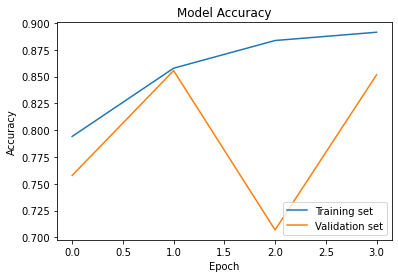

In [71]:
plt.plot(model6.history['accuracy'])
plt.plot(model6.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='lower right')
plt.show()

### Loss Baseline Plot 

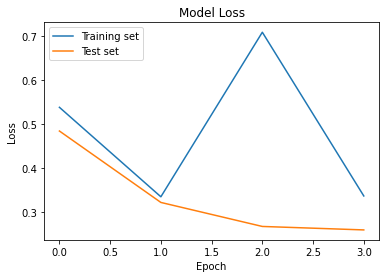

In [72]:
plt.plot(model6.history['val_loss'])
plt.plot(model6.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()